In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import math

In [55]:
df=pd.read_csv('BibliotecheQuartiere.csv',sep=';',thousands=',')
df

,Anno,Biblioteca,Adulti Iscritti,Ragazzi Iscritti,Totale Iscritti,Libri Acquistati
0,1996,Accursio,4763.0,760.0,5523.0,28257.0
1,1996,Affori,625.0,1682.0,7932.0,3235.0
2,1996,Baggio,316.0,1245.0,4405.0,20956.0
3,1996,Bergamini,698.0,49.0,747.0,4008.0
4,1996,Bibliobus,1117.0,NaN,1117.0,18584.0
...,...,...,...,...,...,...
397,2010,Valvassori Peroni,592.0,15.0,742.0,60049.0
398,2010,Venezia,4506.0,557.0,5063.0,41648.0
399,2010,Vigentina,1636.0,365.0,2001.0,17439.0
400,2010,Villapizzone,906.0,401.0,1307.0,13251.0


In [56]:
df['Anno'].describe()

count     402.000000
mean     2002.937811
std         4.359598
min      1996.000000
25%      1999.000000
50%      2003.000000
75%      2007.000000
max      2010.000000
Name: Anno, dtype: float64

In [57]:
df['Biblioteca'].unique()

array(['Accursio', 'Affori', 'Baggio', 'Bergamini', 'Bibliobus',
       'Biblioteca Centrale Sormani', 'Calvairate', 'Cassina Anna',
       'Chiesa Rossa', 'Crescenzago', 'Dergano - Bovisa',
       "Fra' Cristoforo", 'Gallaratese', 'Genova', 'Gratosoglio', 'Harar',
       'Lorenteggio', 'Montemartini**', 'Niguarda', 'Oglio',
       'Parco Sempione', 'Pianell', 'Quarto Oggiaro', 'S. Ambrogio',
       'Sicilia', 'Tibaldi', 'Venezia', 'Vigentina', 'Villapizzone',
       'Venezia**', 'Pianell**', 'Accursio *', 'Genova**', 'Sicilia**',
       'Zara**', 'Tibaldi *', 'Vigentina *', 'Zara', 'Accursio*',
       'Chiesa Rossa*', "Fra' Cristoforo*", 'Oglio*', 'Quarto Oggiaro*',
       'S. Ambrogio*', 'Tibaldi*', 'Vigentina*', 'Baggio*', 'Calvairate*',
       'Dergano*', 'Gallaratese*', 'Niguarda*', "Sant' Ambrogio",
       'Baggio *', 'Calvairate *', 'Chiesa Rossa *', 'Crescenzago*',
       'Dergano', 'Gallaratese *', 'Gratosoglio**', 'Harar *',
       'Lorenteggio*', 'Sicilia *', 'Villapizzone *

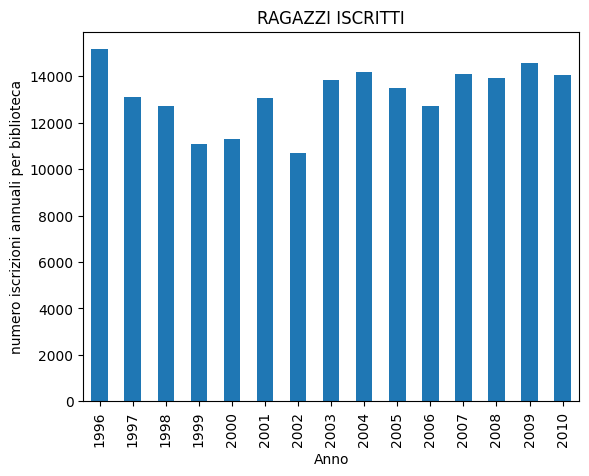

In [58]:
ragazzi=df.groupby('Anno')['Ragazzi Iscritti'].sum()
ragazzi.plot.bar()
plt.ylabel("numero iscrizioni annuali per biblioteca")
plt.title("RAGAZZI ISCRITTI")
plt.show()

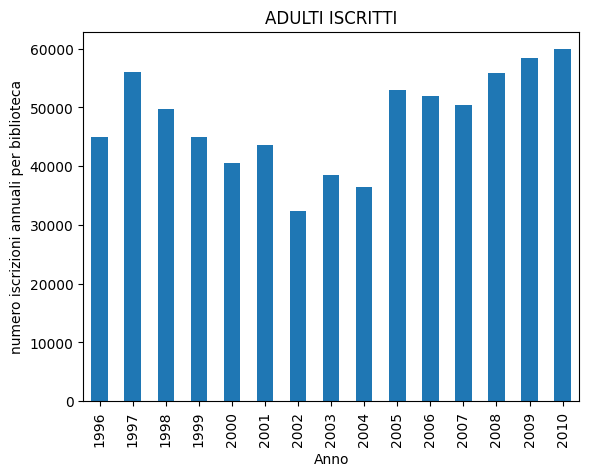

In [59]:
adulti=df.groupby('Anno')['Adulti Iscritti'].sum()
adulti.plot.bar()
plt.ylabel("numero iscrizioni annuali per biblioteca")
plt.title("ADULTI ISCRITTI")
plt.show()

In [66]:
mean_r=ragazzi.mean()
print(mean_r)
std_r=ragazzi.std()
print(std_r)
coeff_r=std_r/mean_r
print(coeff_r)

13206.2
1310.5213902434841
0.09923531297750178


In [61]:
mean_a=adulti.mean()
print(mean_a)
std_a=adulti.std()
print(std_a)
coeff_a=std_a/mean_a
print(coeff_a)

47777.53333333333
8375.92176476857
0.17531088736481237


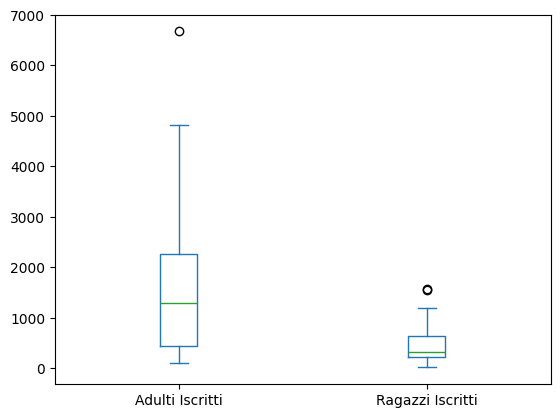

In [64]:
annofiltro=df[df['Anno']==2000]
iscrizioni=annofiltro[['Adulti Iscritti','Ragazzi Iscritti']]
iscrizioni.plot.box()
plt.show()

In [70]:
len(annofiltro[annofiltro['Ragazzi Iscritti']>300])/len(annofiltro)

0.4444444444444444

In [72]:
len(annofiltro[annofiltro['Totale Iscritti']>950])/len(annofiltro)

0.5555555555555556

# Esercizio 3

In [75]:
bibliobus=df[df['Biblioteca']=='Bibliobus']
bibliobus

,Anno,Biblioteca,Adulti Iscritti,Ragazzi Iscritti,Totale Iscritti,Libri Acquistati
4,1996,Bibliobus,1117.0,NaN,1117.0,18584.0
33,1997,Bibliobus,964.0,NaN,964.0,13868.0
61,1998,Bibliobus,113.0,NaN,113.0,10592.0
88,1999,Bibliobus,NaN,NaN,933.0,9179.0
114,2000,Bibliobus,933.0,NaN,933.0,13.0
141,2001,Bibliobus,11.0,NaN,11.0,16136.0
167,2002,Bibliobus,103.0,NaN,103.0,16739.0
193,2003,Bibliobus,103.0,NaN,103.0,248.0
220,2004,Bibliobus,1434.0,NaN,1434.0,2408.0
247,2005,Bibliobus,1094.0,NaN,1094.0,24965.0


In [85]:
bibliobus.describe()

,Anno,Adulti Iscritti,Ragazzi Iscritti,Totale Iscritti,Libri Acquistati
count,15.000000,14.000000,0.0,15.000000,15.000000
mean,2003.000000,820.000000,NaN,827.533333,13748.400000
std,4.472136,584.321039,NaN,563.821257,9269.877721
min,1996.000000,11.000000,NaN,11.000000,13.000000
25%,1999.500000,118.250000,NaN,123.500000,5793.500000
50%,2003.000000,1029.000000,NaN,964.000000,16136.000000
75%,2006.500000,1337.250000,NaN,1329.500000,21030.000000
max,2010.000000,1437.000000,NaN,1437.000000,26138.000000


In [92]:
conj=pd.crosstab(bibliobus['Anno'], pd.cut(bibliobus['Totale Iscritti'], bins=(0, 500, 750, 1000, 1250, 1500)))
conj

Totale Iscritti,"(0, 500]","(750, 1000]","(1000, 1250]","(1250, 1500]"
Anno,,,,
1996,0,0,1,0
1997,0,1,0,0
1998,1,0,0,0
1999,0,1,0,0
2000,0,1,0,0
2001,1,0,0,0
2002,1,0,0,0
2003,1,0,0,0
2004,0,0,0,1


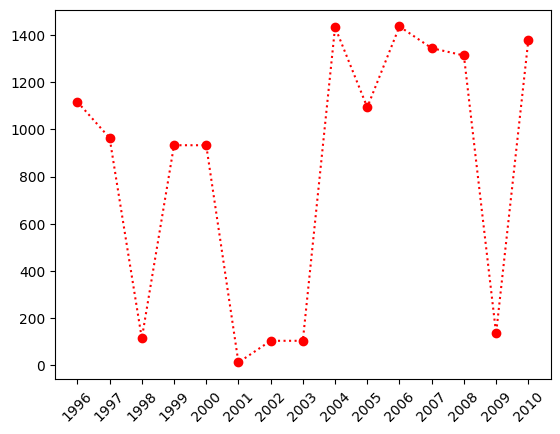

In [113]:
annobb=bibliobus['Anno']
x=np.arange(1996,2011,1)
tibb=bibliobus['Totale Iscritti']
plt.plot(annobb, tibb, color='red', linestyle='dotted', marker='o')
plt.xticks(x)
plt.xticks(rotation=45)
plt.show()

In [96]:
annobb.corr(tibb)

0.26937070854593703

In [136]:
affori=df[df['Biblioteca']=='Affori'][['Anno','Totale Iscritti']]
qog=df[df['Biblioteca']=='Quarto Oggiaro'][['Anno','Totale Iscritti']]
affori['Frequenza Relativa'] = affori['Totale Iscritti'] / affori['Totale Iscritti'].sum()
qog['Frequenza Relativa'] = qog['Totale Iscritti'] / qog['Totale Iscritti'].sum()
affori['Frequenza Cumulata']= affori['Frequenza Relativa'].cumsum()
qog['Frequenza Cumulata']= qog['Frequenza Relativa'].cumsum()
affori

,Anno,Totale Iscritti,Frequenza Relativa,Frequenza Cumulata
1,1996,7932.0,0.118531,0.118531
30,1997,7927.0,0.118457,0.236988
58,1998,7172.0,0.107174,0.344162
85,1999,6925.0,0.103483,0.447646
111,2000,64.0,0.000956,0.448602
138,2001,6044.0,0.090318,0.538920
164,2002,5034.0,0.075225,0.614145
190,2003,5729.0,0.085611,0.699756
217,2004,543.0,0.008114,0.707871
297,2007,4519.0,0.067529,0.775400


In [135]:
qog

,Anno,Totale Iscritti,Frequenza Relativa
22,1996,1268.0,0.060847
50,1997,1044.0,0.050098
78,1998,992.0,0.047603
104,1999,1077.0,0.051682
130,2000,945.0,0.045348
156,2001,942.0,0.045204
235,2004,2355.0,0.113009
262,2005,2564.0,0.123039
288,2006,2438.0,0.116992
314,2007,2343.0,0.112433


# Esercizio 4

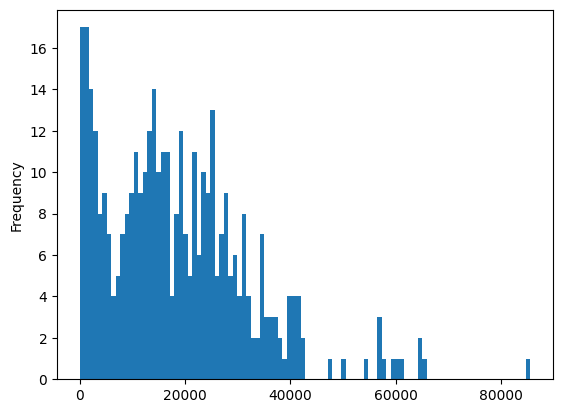

In [150]:
acq=df['Libri Acquistati']
acq.plot.hist(bins=100)
plt.show()

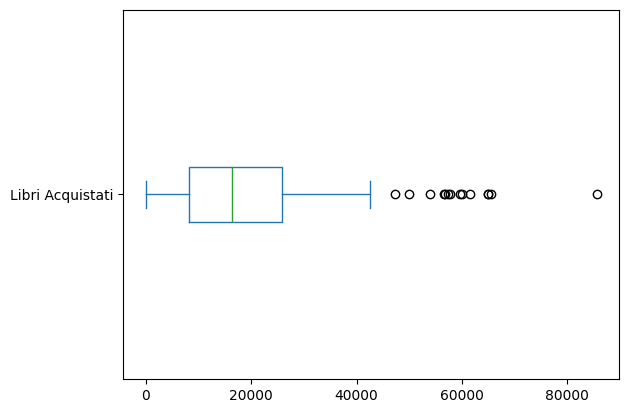

In [151]:
acq.plot.box(whis=1.0,vert=False)
plt.show()

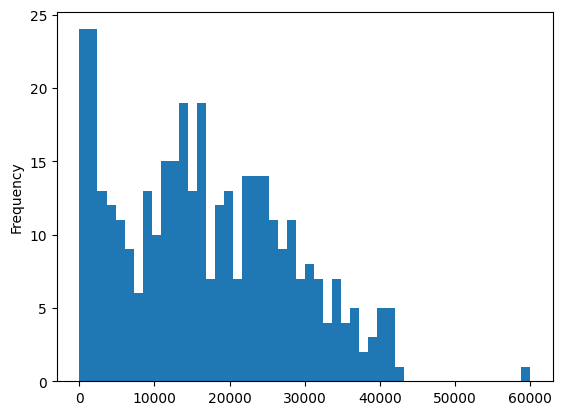

In [159]:
acqf=df[df['Biblioteca']!="Biblioteca Centrale Sormani"]['Libri Acquistati']
acqf.plot.hist(bins=50)
plt.show()

<Axes: >

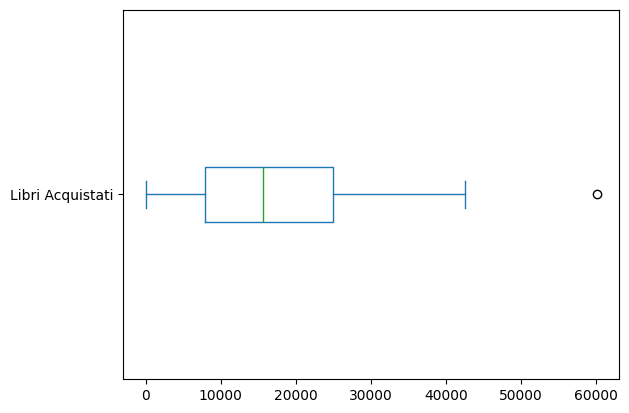

In [155]:
acqf.plot.box(vert=False)

In [170]:
filt=df[df['Biblioteca']!='Biblioteca Centrale Sormani']
mean=filt['Totale Iscritti'].mean()
std=filt['Totale Iscritti'].std()
print(std)
n=len(filt)
dist=st.norm()
2*dist.cdf(100/std*math.sqrt(n))-1

1818.892521110321


0.7205495091071759

In [171]:
((dist.ppf(0.95)*std)/100)**2

895.0938806292079